## Lab 1: Intro to PyTorch and Music Generation with RNNs

This Jupyter notebook is part of the MIT Introduction to Deep Learning course, reimagined using PyTorch, a popular deep learning library known for its dynamic computation graph and ease of use. This lab introduces the user to the basics of PyTorch and demonstrates its application in defining and training neural networks.

### Part 1: Introduction to PyTorch
- **Installation and Setup:** The lab begins with instructions on installing PyTorch and essential dependencies, highlighting PyTorch's straightforward interface and dynamic computational graph capabilities.
- **Understanding Tensors:** Students are introduced to tensors in PyTorch, which are similar to multi-dimensional arrays. The lab covers how to create tensors, understand their shapes and ranks, and manipulate them using PyTorch's comprehensive tensor operations.

### Part 2: Neural Networks in PyTorch
- **Defining Layers and Networks:** The lab explores defining simple neural network layers using `torch.nn.Module` and `torch.nn.Sequential`. It explains how to construct a neural network, focusing on layers like `nn.Linear` for dense (fully connected) layers and `nn.Sigmoid` for activation functions.
- **Custom Layers and Subclassing:** The lab dives into creating custom neural network models by subclassing `torch.nn.Module`. This approach provides flexibility for defining custom behaviors, such as unique forward passes and layer configurations.
- **Sequential vs. Subclassing:** Students learn the differences between using `nn.Sequential` and subclassing `nn.Module` to build models, understanding the benefits and use cases for each method.

### Part 3: Automatic Differentiation and Training
- **Autograd for Automatic Differentiation:** The lab covers PyTorch's autograd system, which automatically computes gradients for tensor operations. This feature is essential for training neural networks using backpropagation.
- **Gradient Descent Optimization:** Students implement a simple gradient descent optimization algorithm, reinforcing their understanding of how gradients are used to update model parameters and minimize loss functions.

### Practical Applications and Exercises
By the end of the lab, you will have gained a comprehensive understanding of PyTorch, including working with tensors, building neural networks, and leveraging PyTorch's dynamic computation graph for efficient model training. This foundation will equip you with the skills necessary to tackle more complex deep learning tasks and projects using PyTorch.


## Lab 1: Intro to PyTorch and Music Generation with RNNs

In [4]:
import os
import regex as re
import subprocess
import urllib
import numpy as np
import torch

from IPython.display import Audio


PyTorch does not have a separate data type for strings, so we'll handle them as Python strings or use different approaches based on the context.Strings in PyTorch: PyTorch does not have a dedicated string tensor type. Instead, strings are handled as regular Python strings. If you need to process strings in a tensor-like manner, you can convert them to indices using tokenization techniques.

Numeric Tensors: For numeric constants, you can use torch.tensor with the appropriate dtype, as shown with number.

Rank of Tensor: In PyTorch we use the .dim() method of a tensor, which gives the number of dimensions. Since sport is handled as a regular string, we use len(sport) to represent the length of the string.



In [7]:
# Define the constants
sport = "Tennis"  # PyTorch does not support string tensors; handle as a regular string
number = torch.tensor(1.41421356237, dtype=torch.float64)

# PyTorch doesn't have a direct equivalent for tf.rank for strings, but we can use len(sport) for its length.
print(f"`sport` is a {len(sport)}-character string.")
print(f"`number` is a {number.dim()}-d Tensor")



`sport` is a 6-character string.
`number` is a 0-d Tensor


Handling Strings: In PyTorch strings are typically handled as Python lists or other Python structures. If you need to work with string data in a tensor-like fashion, consider using techniques like tokenization, converting strings to indices, or using character-level encoding.

Numeric Tensors: Numeric data can be represented directly as tensors using torch.tensor. The dtype is specified similarly, using dtype=torch.float64 for 64-bit floating-point numbers.

Tensor Shape and Rank: In PyTorch, .shape gives the shape of the tensor, and .dim() provides the rank (number of dimensions) of the tensor. For the list of strings (sports), we simply mention that it is a list and use len(sports) to indicate the number of elements.

In [13]:
# Define the tensors
sports = ["Tennis", "Basketball"]  # Handle as a Python list of strings
numbers = torch.tensor([3.141592, 1.414213, 2.71821], dtype=torch.float64)

# Print the shape and rank
# For the list of strings, we simply state that it is a list and provide the number of elements
print(f"`sports` is a list with {len(sports)} elements.")
print(f"`numbers` is a {numbers.dim()}-d Tensor with shape: {numbers.shape}")


`sports` is a list with 2 elements.
`numbers` is a 1-d Tensor with shape: torch.Size([3])


Creating the Tensor: The torch.tensor function is used to create a tensor from the given list of lists. This is analogous to tf.constant in TensorFlow.

Checking Tensor Type: We use isinstance(matrix, torch.Tensor) to verify that matrix is indeed a PyTorch tensor.

Checking Tensor Rank: The matrix.dim() method returns the number of dimensions (rank) of the tensor, similar to tf.rank(matrix).numpy() in TensorFlow.

In [14]:
# Define a 2-d Tensor
matrix = torch.tensor([[1.0, 2.0, 3.0, 4.0], [5.0, 6.0, 7.0, 8.0]])

# Check that matrix is a torch Tensor and has rank 2
assert isinstance(matrix, torch.Tensor), "matrix must be a torch Tensor object"
assert matrix.dim() == 2, "matrix must be a 2-d tensor"

print(f"matrix:\n{matrix}")


matrix:
tensor([[1., 2., 3., 4.],
        [5., 6., 7., 8.]])


    Creating the 4D Tensor: In PyTorch, torch.zeros([10, 256, 256, 3]) creates a 4-dimensional tensor filled with zeros. The dimensions [10, 256, 256, 3] correspond to 10 images, each with a height and width of 256 pixels and 3 color channels (RGB).

    Checking Tensor Type: The isinstance(images, torch.Tensor) check ensures that images is a PyTorch tensor.

    Checking Tensor Rank: The images.dim() method returns the number of dimensions of the tensor. We expect this to be 4.

    Checking Tensor Shape: The shape of the tensor is verified using images.shape, ensuring it matches [10, 256, 256, 3].

This PyTorch code snippet initializes a 4D tensor with zeros, akin to a batch of 10 RGB images of size 256x256 pixels, and verifies its properties.

In [12]:
# Define a 4-d Tensor
# This represents 10 images, each of size 256x256 with 3 color channels (RGB)
images = torch.zeros([10, 256, 256, 3])

# Check that images is a torch Tensor and has rank 4
assert isinstance(images, torch.Tensor), "images must be a torch Tensor object"
assert images.dim() == 4, "images must be of rank 4"
assert list(images.shape) == [10, 256, 256, 3], "images is incorrect shape"

print(f"images shape: {images.shape}")


images shape: torch.Size([10, 256, 256, 3])


1.2 Computations on Tensors

A convenient way to think about and visualize computations in PyTorch is in terms of graphs. We can define this graph in terms of Tensors, which hold data, and the mathematical operations that act on these Tensors in some order. Let's look at a simple example, and define this computation using PyTorch:




Creating Tensors: In PyTorch, you create tensors using torch.tensor. Here, a and b are tensors with the values 15 and 61, respectively.

Adding Tensors:
    torch.add(a, b) adds the tensors a and b and assigns the result to c1.
    a + b is an alternative way to add tensors in PyTorch, as the + operator is overridden to handle tensor addition. The result is assigned to c2.

Printing Results: The values of c1 and c2 are printed, both of which should output 76, as the addition of 15 and 61 equals 76.


In [15]:
import torch

# Create the tensors and initialize values
a = torch.tensor(15)
b = torch.tensor(61)

# Add them!
c1 = torch.add(a, b)
c2 = a + b  # PyTorch also overrides the "+" operator for tensors

print(c1)
print(c2)


tensor(76)
tensor(76)


Creating the Function: The function func(a, b) takes two tensors a and b as inputs.

Addition (c):

    c = torch.add(a, b) computes the element-wise addition of tensors a and b. This is equivalent to tf.add(a, b) in TensorFlow.

Subtraction (d):

    d = torch.subtract(b, 1) subtracts 1 from each element in tensor b. This is equivalent to tf.subtract(b, 1) in TensorFlow.

Multiplication (e):

    e = torch.multiply(c, d) performs element-wise multiplication of tensors c and d. This is equivalent to tf.multiply(c, d) in TensorFlow.

Now, we can call this function to execute the computation graph given some inputs a,b:


In [17]:
import torch

# Define the computation function
def func(a, b):
    '''Define the operation for c, d, e using torch.add, torch.subtract, torch.multiply.'''
    c = torch.add(a, b)       # Equivalent to tf.add(a, b)
    d = torch.subtract(b, 1)  # Equivalent to tf.subtract(b, 1)
    e = torch.multiply(c, d)  # Equivalent to tf.multiply(c, d)
    return e

# Consider example values for a, b
a, b = 1.5, 2.5

# Convert a and b to tensors
a_tensor = torch.tensor(a)
b_tensor = torch.tensor(b)

# Execute the computation
e_out = func(a_tensor, b_tensor)
print(e_out)


tensor(6.)


## Neural networks in PyTorch

Tensors can flow through abstract types called Layers -- the building blocks of neural networks. Layers implement common neural networks operations, and are used to update weights, compute losses, and define inter-layer connectivity. We will first define a Layer to implement the simple perceptron defined above.

In [20]:
import torch.nn as nn
import torch.nn.functional as F

# Define the custom dense layer class
class OurDenseLayer(nn.Module):
    def __init__(self, n_output_nodes):
        super(OurDenseLayer, self).__init__()
        self.n_output_nodes = n_output_nodes
        self.W = None
        self.b = None

    def build(self, input_shape):
        d = int(input_shape[-1])
        # Define and initialize parameters: a weight matrix W and bias b
        # Note that parameter initialization is random!
        self.W = nn.Parameter(torch.randn(d, self.n_output_nodes))
        self.b = nn.Parameter(torch.randn(1, self.n_output_nodes))

    def forward(self, x):
        '''Define the operation for z and y'''
        z = torch.matmul(x, self.W) + self.b
        y = torch.sigmoid(z)
        return y

# Set random seed for reproducibility
torch.manual_seed(1)

# Create an instance of the layer
layer = OurDenseLayer(3)

# Manually call the build method to initialize weights
layer.build((1, 2))

# Define input tensor
x_input = torch.tensor([[1, 2.]], dtype=torch.float32)

# Perform the forward pass
y = layer.forward(x_input)

# Test the output
print(y.detach().numpy())



[[0.59416693 0.43654308 0.21446949]]


In PyTorch, you can use the nn.Sequential module to stack layers in a similar way to TensorFlow's Keras Sequential API. Here’s how you can define a simple neural network with a single dense (fully connected) layer using nn.Sequential:

Importing Required Modules:

    torch: The main library for PyTorch.
    torch.nn: A sub-library containing modules and loss functions.

Defining the Neural Network:

    nn.Sequential is used to define a sequence of layers. Each layer's output serves as the next layer's input.
    nn.Linear(in_features, out_features): This layer applies a linear transformation to the input data, i.e., y=xAT+by=xAT+b. Here, in_features is the size of each input sample, and out_features is the size of each output sample.
    nn.Sigmoid(): This applies the sigmoid activation function element-wise, which squashes the output to a range between 0 and 1.

Printing the Model Structure:

    The print(model) statement shows the architecture of the model, displaying the layers in the order they were added.

Example Input Tensor:

    x_input is defined as a 2D tensor with shape (1, 2), representing a single input sample with 2 features.

Forward Pass:

    y_output = model(x_input): This line performs the forward pass through the network. The input tensor is passed through each layer sequentially.

Output:

    print(y_output): This prints the output tensor, which is the result after passing through the linear transformation and the sigmoid activation.

# Define a simple neural network using nn.Sequential
model = nn.Sequential(
    nn.Linear(in_features=2, out_features=3),
    nn.Sigmoid()
)

# Print the model structure
print(model)

# Example input tensor
x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32)

# Perform the forward pass
y_output = model(x_input)

# Print the output
print(y_output)


In [22]:
import torch
import torch.nn as nn

# Define the number of outputs
n_output_nodes = 3

# First define the model using nn.Sequential
model = nn.Sequential()

# Define a dense (fully connected) layer
# Remember: in PyTorch, nn.Linear handles both W (weights) and b (bias)
dense_layer = nn.Linear(in_features=2, out_features=n_output_nodes)

# Add the dense layer to the model
model.add_module("dense_layer", dense_layer)

# Add an activation function (Sigmoid in this case)
model.add_module("activation", nn.Sigmoid())

# Print the model to see the structure
print(model)

# Example input tensor
x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32)

# Perform the forward pass
y_output = model(x_input)

# Print the output
print(y_output)



Sequential(
  (dense_layer): Linear(in_features=2, out_features=3, bias=True)
  (activation): Sigmoid()
)
tensor([[0.6207, 0.9025, 0.1084]], grad_fn=<SigmoidBackward0>)


Importing PyTorch Modules:

    torch and torch.nn are imported to use PyTorch's tensor operations and neural network modules.

Defining the Model:

    model = nn.Sequential(): A sequential container for stacking layers.
    nn.Linear(in_features=2, out_features=n_output_nodes): A fully connected layer with 2 input features and 3 output nodes.
    nn.Sigmoid(): A sigmoid activation function is added to the model.

Example Input Tensor:

    x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32): This defines the input tensor with shape (1, 2), representing one input sample with two features.

Feeding Input into the Model:

    model_output = model(x_input).detach().numpy(): This line feeds the input tensor into the model and computes the output. The detach() method is used to separate the output from the computation graph (which is not necessary for this example but is good practice when converting to NumPy), and .numpy() converts the tensor to a NumPy array for easier handling or printing.

Output:

    print(model_output): This prints the output of the model.

In [26]:
# Define the number of outputs
n_output_nodes = 3

# First define the model using nn.Sequential
model = nn.Sequential()

# Define a dense (fully connected) layer
dense_layer = nn.Linear(in_features=2, out_features=n_output_nodes)

# Add the dense layer to the model
model.add_module("dense_layer", dense_layer)

# Add an activation function (Sigmoid in this case)
model.add_module("activation", nn.Sigmoid())

# Example input tensor
x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32)

# Test the model with the example input
model_output = model(x_input).detach().numpy()
print(model_output)


[[0.42321217 0.34873796 0.57636577]]


To define a neural network using subclassing in PyTorch, you can subclass torch.nn.Module and define the layers and the forward pass within the class. This method offers more flexibility than using nn.Sequential, as it allows for more complex architectures and custom behaviors.

In [29]:
# Define a custom neural network class
class CustomModel(nn.Module):
    def __init__(self, n_output_nodes):
        super(CustomModel, self).__init__()
        # Define the dense (fully connected) layer
        self.dense = nn.Linear(in_features=2, out_features=n_output_nodes)
        # Define the activation function
        self.activation = nn.Sigmoid()

    def forward(self, x):
        # Define the forward pass
        x = self.dense(x)
        x = self.activation(x)
        return x

# Define the number of output nodes
n_output_nodes = 3

# Instantiate the model
model = CustomModel(n_output_nodes)

# Print the model structure
print(model)

# Example input tensor
x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32)

# Perform the forward pass
model_output = model(x_input).detach().numpy()
print(model_output)


CustomModel(
  (dense): Linear(in_features=2, out_features=3, bias=True)
  (activation): Sigmoid()
)
[[0.75172305 0.19163872 0.44390368]]


In [30]:
# Define the custom model class using subclassing
class SubclassModel(nn.Module):
    def __init__(self, n_output_nodes):
        super(SubclassModel, self).__init__()
        '''Define the model's single Dense layer'''
        self.dense_layer = nn.Linear(in_features=2, out_features=n_output_nodes)
        self.activation = nn.Sigmoid()

    # Define the forward pass
    def forward(self, inputs):
        x = self.dense_layer(inputs)
        return self.activation(x)

# Define the number of output nodes
n_output_nodes = 3

# Instantiate the model
model = SubclassModel(n_output_nodes)

# Print the model structure
print(model)

# Example input tensor
x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32)

# Perform the forward pass
model_output = model(x_input).detach().numpy()
print(model_output)


SubclassModel(
  (dense_layer): Linear(in_features=2, out_features=3, bias=True)
  (activation): Sigmoid()
)
[[0.54511744 0.20448305 0.758056  ]]


Subclassing nn.Module:

    The IdentityModel class inherits from torch.nn.Module. In the constructor (__init__), a dense layer is defined using nn.Linear, followed by an activation function, nn.Sigmoid.

forward Method:

    The forward method defines the forward pass of the network. It takes inputs and an optional isidentity flag.
    If isidentity is True, the method returns the inputs unchanged, simulating an identity operation.
    Otherwise, the inputs are passed through the dense layer followed by the sigmoid activation function, and the result is returned.

Model Instantiation:

    model = IdentityModel(n_output_nodes) creates an instance of the IdentityModel with n_output_nodes outputs.

Input Tensor:

    x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32) defines an example input tensor.

Forward Pass:

    The model is tested in two scenarios:
        With isidentity=False, the model processes the input through the dense layer and activation.
        With isidentity=True, the model returns the input tensor as is.

Output:

    The outputs are printed for both normal processing and identity processing scenarios.

In [35]:
class IdentityModel(nn.Module):
    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        # Define the dense layer
        self.dense_layer = nn.Linear(in_features=2, out_features=n_output_nodes)
        self.activation = nn.Sigmoid()

    def forward(self, inputs, isidentity=False):
        # Apply the dense layer followed by sigmoid activation
        x = self.activation(self.dense_layer(inputs))
        # If isidentity is True, return the inputs unchanged
        if isidentity:
            return inputs
        return x

# Define the number of output nodes
n_output_nodes = 3

# Instantiate the model
model = IdentityModel(n_output_nodes)

# Example input tensor
x_input = torch.tensor([[1.0, 2.0]], dtype=torch.float32)

# Perform the forward pass without identity behavior
output_normal = model(x_input, isidentity=False)
print(f"Output with normal processing:\n{output_normal}")

# Perform the forward pass with identity behavior
output_identity = model(x_input, isidentity=True)
print(f"Output with identity processing:\n{output_identity}")


Output with normal processing:
tensor([[0.3715, 0.2644, 0.2480]], grad_fn=<SigmoidBackward0>)
Output with identity processing:
tensor([[1., 2.]])


    Model Definition:
        IdentityModel is a neural network class inheriting from nn.Module.
        It has one fully connected layer (fc) followed by a ReLU activation function (relu).

    Forward Method:
        The forward method defines the forward pass of the network.
        If isidentity is True, the activation function is skipped, and the identity output (just the linear transformation) is returned.
        If isidentity is False, the output is passed through a ReLU activation function.

    Input Tensor:
        x_input is a tensor with shape (1, 2), representing a batch of one sample with two features.

    Outputs:
        out_activate: The output with the activation function applied.
        out_identity: The output without the activation function (identity output).

    Manual Weights and Biases: The weights and biases for the linear layer self.fc are manually set using torch.tensor and assigned to self.fc.weight and self.fc.bias.
    Weight Values: The weight matrix [[1.0, 1.0], [0.5, 0.5], [0.5, -0.5]] and bias vector [1.0, 0.0, -1.0] are examples. You may need to adjust these values based on your original model's parameters to match the desired output.


In [42]:
class IdentityModel(nn.Module):
    def __init__(self, n_output_nodes):
        super(IdentityModel, self).__init__()
        self.fc = nn.Linear(2, n_output_nodes)
        self.relu = nn.ReLU()

        # Manually setting weights and biases
        self.fc.weight = nn.Parameter(torch.tensor([[1.0, 1.0], [0.5, 0.5], [0.5, -0.5]]))
        self.fc.bias = nn.Parameter(torch.tensor([1.0, 0.0, -1.0]))

    def forward(self, x, isidentity=False):
        x = self.fc(x)
        if not isidentity:
            x = self.relu(x)
        return x

# Define the number of output nodes
n_output_nodes = 3
model = IdentityModel(n_output_nodes)

# Create an input tensor
x_input = torch.tensor([[1., 2.]], dtype=torch.float32)

# Get the network outputs
out_activate = model(x_input)  # with activation
out_identity = model(x_input, isidentity=True)  # identity output

print(f"Network output with activation: {out_activate.detach().numpy()}; network identity output: {out_identity.detach().numpy()}")



Network output with activation: [[4.  1.5 0. ]]; network identity output: [[ 4.   1.5 -1.5]]


In PyTorch, you can achieve compute gradient functionality using the automatic differentiation package, torch.autograd. Here's the equivalent code for computing the gradient of y=x2y=x2 with respect to xx, where x=3.0x=3.0:

requires_grad=True: This ensures that PyTorch tracks all operations on the tensor x so that it can compute gradients later.
y = x * x: Defines the function yy as x2x2.
y.backward(): This computes the gradient of yy with respect to all tensors with requires_grad=True. The result for x is stored in x.grad.
x.grad: This contains the computed gradient, which in this case is the derivative of x2x2 at x=3.0x=3.0, which should be 6.0.

In [43]:
import torch

# Define the variable x and enable gradient computation
x = torch.tensor(3.0, requires_grad=True)

# Define the function y = x^2
y = x * x

# Compute the gradient (dy/dx)
y.backward()

# Access the gradient
dy_dx = x.grad

assert dy_dx.item() == 6.0
print(f"The gradient of y with respect to x is: {dy_dx.item()}")


The gradient of y with respect to x is: 6.0


In training neural networks, we use differentiation and stochastic gradient descent (SGD) to optimize a loss function. Now that we have a sense of how GradientTape can be used to compute and access derivatives, we will look at an example where we use automatic differentiation and SGD to find the minimum of . Here is a variable for a desired value we are trying to optimize for; represents a loss that we are trying to minimize. While we can clearly solve this problem analytically (), considering how we can compute this using GradientTape sets us up nicely for future labs where we use gradient descent to optimize entire neural network losses.

Initializing x=-0.563052773475647


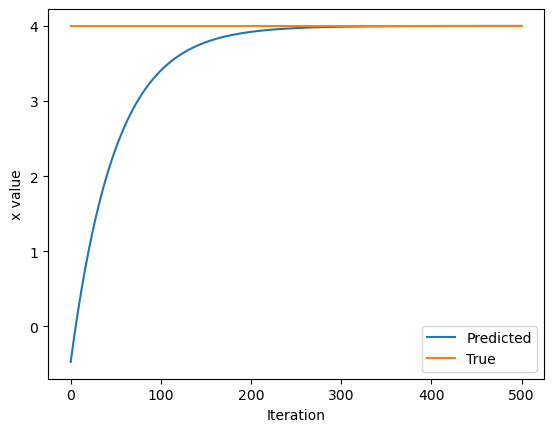

In [45]:
import torch
import matplotlib.pyplot as plt

# Initialize a random value for our initial x
x = torch.tensor([torch.randn(1)], requires_grad=True)
print(f"Initializing x={x.item()}")

learning_rate = 1e-2  # learning rate for SGD
history = []

# Define the target value
x_f = 4

# We will run SGD for a number of iterations. At each iteration, we compute the loss,
# compute the derivative of the loss with respect to x, and perform the SGD update.
for i in range(500):
    # Define the loss as described above
    loss = (x - x_f)**2

    # Compute the gradient of the loss with respect to x
    loss.backward()

    # SGD update
    with torch.no_grad():
        x -= learning_rate * x.grad
        x.grad.zero_()  # Reset the gradient to zero after the update

    # Store the current value of x
    history.append(x.item())

# Plot the evolution of x as we optimize towards x_f!
plt.plot(history)
plt.plot([0, 500], [x_f, x_f])
plt.legend(('Predicted', 'True'))
plt.xlabel('Iteration')
plt.ylabel('x value')
plt.show()


Initialization: We initialize x as a tensor with a random normal value and set requires_grad=True to track operations for automatic differentiation.
Loss Function: The loss is defined as (x−xf)2(x−xf​)2, representing the squared difference between the current value of x and the target value x_f.
Gradient Computation: loss.backward() computes the gradient of the loss with respect to x. This stores the gradient in x.grad.
SGD Update: We update x using the formula x=x−learning_rate×gradx=x−learning_rate×grad. torch.no_grad() is used to prevent PyTorch from tracking this operation, as it is part of the optimization step, not the gradient computation. We then reset the gradient to zero with x.grad.zero_().
Plotting: The evolution of x is plotted over the iterations, showing how it converges towards the target value x_f.